![Growdev](https://www.growdev.com.br/assets/images/logo_growdev.png)

![Formação Engenharia de Dados](https://d335luupugsy2.cloudfront.net/cms/files/524558/1707226566/$occu5m8t1op)

# Tópicos da Aula de Hoje

- GROUP BY
- HAVING
- CASE WHEN
- JOIN
- SubQueries
- Comandos Avançados (WITH e VIEW)
- Prática

**Bora pra aula?**

# GROUP BY

Assim como no pandas, podemos agrupar nossos dados de acordo com uma coluna específica e extrair informações agregadas, como médias, somas e etc.

```sql
SELECT FUNC1(coluna1), FUNC2(coluna2)
FROM table1
GROUP BY coluna1
```

<img src="https://jakevdp.github.io/PythonDataScienceHandbook/figures/03.08-split-apply-combine.png" height=600 width=600>

In [ ]:
import sqlite3
import pandas as pd

In [ ]:
con = sqlite3.connect('database.db')

In [ ]:
query = """
SELECT customerNumber, SUM(amount) AS TOTAL_AMOUNT
FROM payments
GROUP BY customerNumber
ORDER BY customerNumber
, TOTAL_AMOUNT DESC
"""

tot_amount_group = pd.read_sql(query,con)
tot_amount_group

,customerNumber,TOTAL_AMOUNT
0,103,22314.36
1,112,80180.98
2,114,180585.07
3,119,116949.68
4,121,104224.79
...,...,...
93,486,77726.59
94,487,42570.37
95,489,29586.15
96,495,65541.74


# HAVING

E se depois de agregarmos nossos dados quisermos aplicar algum filtro?

In [ ]:
query = """
SELECT customerNumber, SUM(amount) AS TOTAL_AMOUNT
FROM payments
WHERE customerNumber>200
GROUP BY customerNumber
HAVING TOTAL_AMOUNT >=50000
ORDER BY customerNumber, TOTAL_AMOUNT DESC
"""

tot_amount_group = pd.read_sql(query,con)
tot_amount_group

,customerNumber,TOTAL_AMOUNT
0,201,61167.18
1,202,70122.19
2,204,55577.26
3,205,93803.30
4,209,75859.32
5,216,68520.47
6,227,89909.80
7,233,68977.67
8,239,80375.24
9,240,71783.75


Se usarmos o ```WHERE```, cometeremos um erro!. depois de agrupar os nossos dados, utilizamos a função ```HAVING```para filtrar os registros.

# CASE WHEN

Às vezes precisamos aplicar regras baseadas em condições para extrair ou criar novas colunas a partir das quais já possuímos. Por exemplo, poderíamos categorizar a coluna amount, criando faixas de valores. Para isso, utilizamos a expressão ```CASE WHEN```.

```sql
SELECT
        CASE
            WHEN condicao1 THEN valor1
            WHEN condicao2 THEN valor2
            ELSE default
        END AS nome da nova_coluna
FROM table1
```

In [ ]:
query="""
SELECT customerNumber, amount,
CASE
  WHEN amount>= 10000 and amount < 20000 THEN 'FAIXA1'
  WHEN amount>= 20000 and amount < 50000 THEN 'FAIXA2'
  ELSE 'FAIXA3'
END AS faixas_amount
FROM payments
"""
#mecessario colocar "," no final da linha que antecede ao CASE
df_faixas = pd.read_sql(query,con)
df_faixas

,customerNumber,amount,faixas_amount
0,103,6066.78,FAIXA3
1,103,14571.44,FAIXA1
2,103,1676.14,FAIXA3
3,112,14191.12,FAIXA1
4,112,32641.98,FAIXA2
...,...,...,...
268,495,59265.14,FAIXA3
269,495,6276.60,FAIXA3
270,496,30253.75,FAIXA2
271,496,32077.44,FAIXA2


# JOIN

Banco de Dados que estamos trabalhando.<br>
![database example](http://www.mysqltutorial.org/wp-content/uploads/2009/12/MySQL-Sample-Database-Schema.png)

JOINS são maneiras de combinar informações de duas ou mais tabelas em uma única. A forma de combinação é definida por meio do tipo de JOIN escolhido. Além disso, é possível combinar uma tabela com ela mesma, ou seja, não precisamos necessariamente de mais de uma tabela para realizar um JOIN. No caso de haver mais de 2 tabelas definimos JOINS múltiplos no ```FROM```.

## SELF JOIN

Como falado anteriormente, uma tabela pode ser combinada consigo mesma baseando-se em uma condição específica nas linhas. Nesse caso, devemos utilizar apelidos para as tabelas do JOIN, de maneira que não haja um comando dúbio para o banco de dados e ele saiba exatamente a qual tabela o usuário se refere.

No nosso banco de dados, temos informações de funcionários (tabela employees), vamos dar uma olhada.

In [ ]:
query='''
SELECT *
FROM employees
'''
pd.read_sql(query,con)

,employeeNumber,lastName,firstName,extension,email,officeCode,reportsTo,jobTitle
0,1002,Murphy,Diane,x5800,dmurphy@classicmodelcars.com,1,NaN,President
1,1056,Patterson,Mary,x4611,mpatterso@classicmodelcars.com,1,1002.0,VP Sales
2,1076,Firrelli,Jeff,x9273,jfirrelli@classicmodelcars.com,1,1002.0,VP Marketing
3,1088,Patterson,William,x4871,wpatterson@classicmodelcars.com,6,1056.0,Sales Manager (APAC)
4,1102,Bondur,Gerard,x5408,gbondur@classicmodelcars.com,4,1056.0,Sale Manager (EMEA)
5,1143,Bow,Anthony,x5428,abow@classicmodelcars.com,1,1056.0,Sales Manager (NA)
6,1165,Jennings,Leslie,x3291,ljennings@classicmodelcars.com,1,1143.0,Sales Rep
7,1166,Thompson,Leslie,x4065,lthompson@classicmodelcars.com,1,1143.0,Sales Rep
8,1188,Firrelli,Julie,x2173,jfirrelli@classicmodelcars.com,2,1143.0,Sales Rep
9,1216,Patterson,Steve,x4334,spatterson@classicmodelcars.com,2,1143.0,Sales Rep


Perceba que existe a coluna ```reportsTo``` que indica o ```employeeNumber``` do seu chefe (pessoa para quem o funcionário responde na empresa)

E se quiséssemos trazer o nome do chefe de cada funcionário, caso ele tenha um?
Podemos fazer um ```SELF JOIN```

```sql
SELECT tabela1.*,
       tabela2.coluna1
       tabela2.coluna2
FROM
    tabela AS tabela1
JOIN
    tabela AS tabela2
    ON tabela1.coluna = tabela2.coluna
```

Vamos trazer o nome do empregado, seu identificador, sua atribuição, o primeiro nome do seu chefe e o identificador do chefe.

In [ ]:
query2 = """
            SELECT employee.employeeNumber  AS ID_EMPREGADO,
                    employee.firstName as NOME_EMPREGADO,
                    employee.jobTitle as CARGO_EMPREGADO,
                    manager.firstName as NOME_CHEFE,
                    manager.employeeNumber  AS ID_CHEFE
            FROM
                employees as employee
            JOIN
                employees as manager
                ON employee.reportsTo = manager.employeeNumber
        """
df_chefe = pd.read_sql(query2, con)
df_chefe

,ID_EMPREGADO,NOME_EMPREGADO,CARGO_EMPREGADO,NOME_CHEFE,ID_CHEFE
0,1056,Mary,VP Sales,Diane,1002
1,1076,Jeff,VP Marketing,Diane,1002
2,1088,William,Sales Manager (APAC),Mary,1056
3,1102,Gerard,Sale Manager (EMEA),Mary,1056
4,1143,Anthony,Sales Manager (NA),Mary,1056
5,1165,Leslie,Sales Rep,Anthony,1143
6,1166,Leslie,Sales Rep,Anthony,1143
7,1188,Julie,Sales Rep,Anthony,1143
8,1216,Steve,Sales Rep,Anthony,1143
9,1286,Foon Yue,Sales Rep,Anthony,1143


## LEFT JOIN

Se quisermos trazer os clientes (customers) e as compras que fizeram, como podemos fazer? Reflita: a tabela de orders (pedidos) pode conter mais de um mesmo cliente (um cliente pode ter vários pedidos) OK. Mas nem todo cliente registrado no sistema precisa necessariamente ter feito uma compra. Se quisermos trazer todos os dados de clientes e suas compras, mesmo aqueles clientes que nunca fizeram compras, podemos utilizar um ```LEFT JOIN```

```sql
SELECT tb1.coluna1,
       tb1.colunas2,
       tb2.coluna1,
       tb2.coluna2,
FROM
    table1 AS tb1
LEFT JOIN
    table2 AST tb2
    ON tb1.coluna1 = tb2.coluna2
```

Vamos trazer os dados dos clientes, suas compras e para aqueles clientes que ainda não fizeram nenhuma compra, vamos trazer apenas os seus dados. Em suma, se tivermos duas tabelas A e B. A ```LEFT JOIN``` B traz todas as linhas de A e traz todas as linhas de B para as quais há correspondência da coluna especificada em A.

In [ ]:
query = '''
            SELECT tb_customers.*,
                    tb_orders.*
            FROM customers as tb_customers
            LEFT JOIN orders as tb_orders
                ON tb_customers.customerNumber = tb_orders.customerNumber
            WHERE tb_orders.customerNumber is not NULL


'''

pd.read_sql(query,con)

,customerNumber,customerName,contactLastName,contactFirstName,phone,addressLine1,addressLine2,city,state,postalCode,country,salesRepEmployeeNumber,creditLimit,orderNumber,orderDate,requiredDate,shippedDate,status,comments,customerNumber
0,103,Atelier graphique,Schmitt,Carine,40.32.2555,"54, rue Royale",None,Nantes,None,44000,France,1370,21000,10123,2003-05-20,2003-05-29,2003-05-22,Shipped,None,103
1,103,Atelier graphique,Schmitt,Carine,40.32.2555,"54, rue Royale",None,Nantes,None,44000,France,1370,21000,10298,2004-09-27,2004-10-05,2004-10-01,Shipped,None,103
2,103,Atelier graphique,Schmitt,Carine,40.32.2555,"54, rue Royale",None,Nantes,None,44000,France,1370,21000,10345,2004-11-25,2004-12-01,2004-11-26,Shipped,None,103
3,112,Signal Gift Stores,King,Jean,7025551838,8489 Strong St.,None,Las Vegas,NV,83030,USA,1166,71800,10124,2003-05-21,2003-05-29,2003-05-25,Shipped,Customer very concerned about the exact color ...,112
4,112,Signal Gift Stores,King,Jean,7025551838,8489 Strong St.,None,Las Vegas,NV,83030,USA,1166,71800,10278,2004-08-06,2004-08-16,2004-08-09,Shipped,None,112
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
321,495,Diecast Collectables,Franco,Valarie,6175552555,6251 Ingle Ln.,None,Boston,MA,51003,USA,1188,85100,10243,2004-04-26,2004-05-03,2004-04-28,Shipped,None,495
322,496,Kelly’s Gift Shop,Snowden,Tony,+64 9 5555500,Arenales 1938 3’A,None,Auckland,None,None,New Zealand,1612,110000,10138,2003-07-07,2003-07-16,2003-07-13,Shipped,None,496
323,496,Kelly’s Gift Shop,Snowden,Tony,+64 9 5555500,Arenales 1938 3’A,None,Auckland,None,None,New Zealand,1612,110000,10179,2003-11-11,2003-11-17,2003-11-13,Cancelled,Customer cancelled due to urgent budgeting iss...,496
324,496,Kelly’s Gift Shop,Snowden,Tony,+64 9 5555500,Arenales 1938 3’A,None,Auckland,None,None,New Zealand,1612,110000,10360,2004-12-16,2004-12-22,2004-12-18,Shipped,None,496


## RIGHT JOIN

O ```RIGHT JOIN``` é similar ao ```LEFT JOIN```, inclusive é possível fazer um ```RIGHT JOIN```utilizando um ```LEFT JOIN``` apenas invertendo a ordem das tabelas. No nosso caso, isso equivaleria a trazer todas as orders, mesmo aquelas que não tem um customerNumber associado.

```sql
SELECT tb1.coluna1,
       tb1.colunas2,
       tb2.coluna1,
       tb2.coluna2,
FROM
    table1 AS tb1
RIGHT JOIN
    table2 AS tb2
    ON tb1.coluna1 = tb2.coluna2
```

In [ ]:
query4 = """
            SELECT tb_customers.*,
                    tb_orders.*
            FROM
                orders as tb_orders
            LEFT JOIN customers as tb_customers
                ON tb_customers.customerNumber = tb_orders.customerNumber
        """
pd.read_sql(query4, con)

,customerNumber,customerName,contactLastName,contactFirstName,phone,addressLine1,addressLine2,city,state,postalCode,country,salesRepEmployeeNumber,creditLimit,orderNumber,orderDate,requiredDate,shippedDate,status,comments,customerNumber
0,363,Online Diecast Creations Co.,Young,Dorothy,6035558647,2304 Long Airport Avenue,None,Nashua,NH,62005,USA,1216,114200,10100,2003-01-06,2003-01-13,2003-01-10,Shipped,None,363
1,128,"Blauer See Auto, Co.",Keitel,Roland,+49 69 66 90 2555,Lyonerstr. 34,None,Frankfurt,None,60528,Germany,1504,59700,10101,2003-01-09,2003-01-18,2003-01-11,Shipped,Check on availability.,128
2,181,Vitachrome Inc.,Frick,Michael,2125551500,2678 Kingston Rd.,Suite 101,NYC,NY,10022,USA,1286,76400,10102,2003-01-10,2003-01-18,2003-01-14,Shipped,None,181
3,121,Baane Mini Imports,Bergulfsen,Jonas,07-98 9555,Erling Skakkes gate 78,None,Stavern,None,4110,Norway,1504,81700,10103,2003-01-29,2003-02-07,2003-02-02,Shipped,None,121
4,141,Euro+ Shopping Channel,Freyre,Diego,(91) 555 94 44,"C/ Moralzarzal, 86",None,Madrid,None,28034,Spain,1370,227600,10104,2003-01-31,2003-02-09,2003-02-01,Shipped,None,141
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
321,124,Mini Gifts Distributors Ltd.,Nelson,Susan,4155551450,5677 Strong St.,None,San Rafael,CA,97562,USA,1165,210500,10421,2005-05-29,2005-06-06,None,In Process,Custom shipping instructions were sent to ware...,124
322,157,Diecast Classics Inc.,Leong,Kelvin,2155551555,7586 Pompton St.,None,Allentown,PA,70267,USA,1216,100600,10422,2005-05-30,2005-06-11,None,In Process,None,157
323,314,Petit Auto,Dewey,Catherine,(02) 5554 67,Rue Joseph-Bens 532,None,Bruxelles,None,B-1180,Belgium,1401,79900,10423,2005-05-30,2005-06-05,None,In Process,None,314
324,141,Euro+ Shopping Channel,Freyre,Diego,(91) 555 94 44,"C/ Moralzarzal, 86",None,Madrid,None,28034,Spain,1370,227600,10424,2005-05-31,2005-06-08,None,In Process,None,141


 ```RIGHT JOIN``` não existe no ```SQLite```. Ele é implementado utilizando o ```LEFT JOIN```. Em alguns SGBDS ele existe.

## INNER JOIN

Outro caso de JOIN é o ```INNER JOIN```. Nesse caso a query retorna apenas os registros em que há correspondência exata entre as colunas das tabelas. Trazendo pro nosso contexto, os clientes que ainda não realizaram alguma pedido não serão retornados.

```sql
SELECT tb1.coluna1,
       tb1.colunas2,
       tb2.coluna1,
       tb2.coluna2,
FROM
    table1 AS tb1
INNER JOIN
    table2 AST tb2
    ON tb1.coluna1 = tb2.coluna2
```

In [ ]:
query = '''
SELECT
  tb_customers.*,
  tb_orders.*

FROM customers as tb_customers
INNER JOIN
  orders as tb_orders
  ON tb_customers.customerNumber = tb_orders.customerNumber

'''
pd.read_sql(query,con)

,customerNumber,customerName,contactLastName,contactFirstName,phone,addressLine1,addressLine2,city,state,postalCode,country,salesRepEmployeeNumber,creditLimit,orderNumber,orderDate,requiredDate,shippedDate,status,comments,customerNumber
0,363,Online Diecast Creations Co.,Young,Dorothy,6035558647,2304 Long Airport Avenue,None,Nashua,NH,62005,USA,1216,114200,10100,2003-01-06,2003-01-13,2003-01-10,Shipped,None,363
1,128,"Blauer See Auto, Co.",Keitel,Roland,+49 69 66 90 2555,Lyonerstr. 34,None,Frankfurt,None,60528,Germany,1504,59700,10101,2003-01-09,2003-01-18,2003-01-11,Shipped,Check on availability.,128
2,181,Vitachrome Inc.,Frick,Michael,2125551500,2678 Kingston Rd.,Suite 101,NYC,NY,10022,USA,1286,76400,10102,2003-01-10,2003-01-18,2003-01-14,Shipped,None,181
3,121,Baane Mini Imports,Bergulfsen,Jonas,07-98 9555,Erling Skakkes gate 78,None,Stavern,None,4110,Norway,1504,81700,10103,2003-01-29,2003-02-07,2003-02-02,Shipped,None,121
4,141,Euro+ Shopping Channel,Freyre,Diego,(91) 555 94 44,"C/ Moralzarzal, 86",None,Madrid,None,28034,Spain,1370,227600,10104,2003-01-31,2003-02-09,2003-02-01,Shipped,None,141
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
321,124,Mini Gifts Distributors Ltd.,Nelson,Susan,4155551450,5677 Strong St.,None,San Rafael,CA,97562,USA,1165,210500,10421,2005-05-29,2005-06-06,None,In Process,Custom shipping instructions were sent to ware...,124
322,157,Diecast Classics Inc.,Leong,Kelvin,2155551555,7586 Pompton St.,None,Allentown,PA,70267,USA,1216,100600,10422,2005-05-30,2005-06-11,None,In Process,None,157
323,314,Petit Auto,Dewey,Catherine,(02) 5554 67,Rue Joseph-Bens 532,None,Bruxelles,None,B-1180,Belgium,1401,79900,10423,2005-05-30,2005-06-05,None,In Process,None,314
324,141,Euro+ Shopping Channel,Freyre,Diego,(91) 555 94 44,"C/ Moralzarzal, 86",None,Madrid,None,28034,Spain,1370,227600,10424,2005-05-31,2005-06-08,None,In Process,None,141


## FULL OUTER JOIN, UNION, UNION ALL

O ```FULL OUTER JOIN``` é a combinação de um ```LEFT JOIN``` com um ```RIGHT JOIN```. Como no SQLite não existe ```RIGHT JOIN```, precisamos utilizar dois ```LEFT JOIN```e um ```UNION```.

Mas o que é o ```UNION```?

<img src='https://www.softwaretestingclass.com/wp-content/uploads/2013/06/sql-union-all-query.png'>

O ```UNION``` funciona como um ```append``` do Pandas e não duplica linhas, caso exista duplicação. O ```UNION ALL``` mantém as linhas duplicadas, caso existam. É importante destacar que tem que haver match dos tipos das colunas.

```sql
SELECT *
FROM table1

UNION ALL

SELECT *
FROM table2

```

Vamos construir nosso ```FULL OUTER JOIN```

In [ ]:
query = '''
            SELECT tb_customers.customerNumber as customerNumber_c,
                    tb_customers.customerName as customerName_c,
                    tb_orders.customerNumber as customerNumber_o,
                    tb_orders.orderNumber as orderNumber_o
            FROM customers as tb_customers
            LEFT JOIN
                orders as tb_orders
                ON tb_customers.customerNumber = tb_orders.customerNumber

            UNION ALL

            SELECT tb_customers.customerNumber as customerNumber_c,
                    tb_customers.customerName as customerName_c,
                    tb_orders.customerNumber as customerNumber_o,
                    tb_orders.orderNumber as orderNumber_o
            FROM orders as tb_orders
            LEFT JOIN
                customers as tb_customers
                ON tb_customers.customerNumber = tb_orders.customerNumber

'''
pd.read_sql(query,con)

,customerNumber_c,customerName_c,customerNumber_o,orderNumber_o
0,103,Atelier graphique,103.0,10123.0
1,103,Atelier graphique,103.0,10298.0
2,103,Atelier graphique,103.0,10345.0
3,112,Signal Gift Stores,112.0,10124.0
4,112,Signal Gift Stores,112.0,10278.0
...,...,...,...,...
671,124,Mini Gifts Distributors Ltd.,124.0,10421.0
672,157,Diecast Classics Inc.,157.0,10422.0
673,314,Petit Auto,314.0,10423.0
674,141,Euro+ Shopping Channel,141.0,10424.0


Verifique que o total de linhas do ```FULL JOIN``` deveria ser a soma das linhas do ```LEFT JOIN``` + linhas do ```RIGHT JOIN```

## CROSS JOIN

O ```CROSS JOIN```realiza todos os cruzamentos possíveis entre as linhas das tabelas especificadas.

```sql
SELECT tb1.coluna1,
       tb1.colunas2,
       tb2.coluna1,
       tb2.coluna2,
FROM
    table1 AS tb1
CROSS JOIN
    table2 AST tb2
```

Note que não precisamos de uma igualdade de chaves como nos outros JOINS.

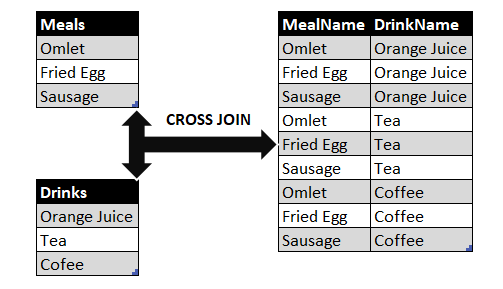

In [ ]:
query7 = """
            SELECT tb_customers.*,
                    tb_orders.*
            FROM
                customers as tb_customers
            CROSS JOIN
                orders as tb_orders

        """
pd.read_sql(query7, con)

,customerNumber,customerName,contactLastName,contactFirstName,phone,addressLine1,addressLine2,city,state,postalCode,country,salesRepEmployeeNumber,creditLimit,orderNumber,orderDate,requiredDate,shippedDate,status,comments,customerNumber
0,103,Atelier graphique,Schmitt,Carine,40.32.2555,"54, rue Royale",None,Nantes,None,44000,France,1370.0,21000,10100,2003-01-06,2003-01-13,2003-01-10,Shipped,None,363
1,103,Atelier graphique,Schmitt,Carine,40.32.2555,"54, rue Royale",None,Nantes,None,44000,France,1370.0,21000,10101,2003-01-09,2003-01-18,2003-01-11,Shipped,Check on availability.,128
2,103,Atelier graphique,Schmitt,Carine,40.32.2555,"54, rue Royale",None,Nantes,None,44000,France,1370.0,21000,10102,2003-01-10,2003-01-18,2003-01-14,Shipped,None,181
3,103,Atelier graphique,Schmitt,Carine,40.32.2555,"54, rue Royale",None,Nantes,None,44000,France,1370.0,21000,10103,2003-01-29,2003-02-07,2003-02-02,Shipped,None,121
4,103,Atelier graphique,Schmitt,Carine,40.32.2555,"54, rue Royale",None,Nantes,None,44000,France,1370.0,21000,10104,2003-01-31,2003-02-09,2003-02-01,Shipped,None,141
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39767,496,Kelly’s Gift Shop,Snowden,Tony,+64 9 5555500,Arenales 1938 3’A,None,Auckland,None,None,New Zealand,1612.0,110000,10421,2005-05-29,2005-06-06,None,In Process,Custom shipping instructions were sent to ware...,124
39768,496,Kelly’s Gift Shop,Snowden,Tony,+64 9 5555500,Arenales 1938 3’A,None,Auckland,None,None,New Zealand,1612.0,110000,10422,2005-05-30,2005-06-11,None,In Process,None,157
39769,496,Kelly’s Gift Shop,Snowden,Tony,+64 9 5555500,Arenales 1938 3’A,None,Auckland,None,None,New Zealand,1612.0,110000,10423,2005-05-30,2005-06-05,None,In Process,None,314
39770,496,Kelly’s Gift Shop,Snowden,Tony,+64 9 5555500,Arenales 1938 3’A,None,Auckland,None,None,New Zealand,1612.0,110000,10424,2005-05-31,2005-06-08,None,In Process,None,141


Verifique que o número de linhas obtidos no ```CROSS JOIN``` é igual ao número de linhas da tabela customer x número de linhas da tabela orders.

# Subqueries

Uma Subquery, ou subconsulta, como também é chamada, é uma instrução SELECT dentro de uma outra consulta. Elas são necessárias quando temos que utilizar o resultado de uma query como entrada para uma outra query. Desta forma, se torna possível efetuar consultas que de outra forma seriam extremamente complicadas ou impossíveis de serem feitas de outra forma.



Podemos ter Subqueries basicamente em três cenários:
- ```SELECT```
- ```FROM```
- ```WHERE``` ou ```HAVING```

## SELECT

Quando usamos uma subquery dentro de um comando ```SELECT``` o resultado da subquery se torna uma coluna da tabela.

```sql
SELECT coluna1, coluna2 From (SELECT FUNC1(coluna1) FROM table)

FROM table1

```


In [ ]:
query3 = """
SELECT *
from
(SELECT productLine
, sum(quantityInStock) as media_estoque, AVG(buyPrice) as avg_price
FROM products
group by productLine
HAVING sum(quantityInStock) > 10000)
"""
tb_soma = pd.read_sql(query3,con)
tb_soma

Vamos tentar extrair a variação percentual da coluna buyPrice em relação à média para cada item!

In [ ]:
query3 = """
SELECT SUM(media_estoque) as soma
from
(SELECT productLine
, avg(quantityInStock) as media_estoque
FROM products
group by productLine)
"""
tb_soma = pd.read_sql(query3,con)
tb_soma

,soma
0,33306.388408


In [ ]:
query3 = """
        SELECT productLine
        ,(buyPrice/avg(quantityInStock)*100) as relacao
        FROM products as products
        group by productLine
        """
EX1 = pd.read_sql(query3,con)
EX1

,productLine,relacao
0,Classic Cars,0.806696
1,Motorcycles,0.640063
2,Planes,0.631336
3,Ships,1.116908
4,Trains,0.673634
5,Trucks and Buses,2.095311
6,Vintage Cars,0.520051


In [ ]:
query7 = """
            SELECT
                   tb_orders.*
                  , tb_ordersDetails.*
                  , tb_products.*
            FROM
                orders as tb_orders
            LEFT JOIN
                orderdetails as tb_ordersDetails
                on tb_orders.orderNumber = tb_ordersDetails.orderNumber
            LEFT JOIN
                products as tb_products
                on tb_ordersDetails.productCode = tb_products.productCode

        """
base = pd.read_sql(query7, con)
base

,orderNumber,orderDate,requiredDate,shippedDate,status,comments,customerNumber,orderNumber,productCode,quantityOrdered,...,orderLineNumber,productCode,productName,productLine,productScale,productVendor,productDescription,quantityInStock,buyPrice,MSRP
0,10100,2003-01-06,2003-01-13,2003-01-10,Shipped,None,363,10100,S18_1749,30,...,3,S18_1749,1917 Grand Touring Sedan,Vintage Cars,1:18,Welly Diecast Productions,This 1:18 scale replica of the 1917 Grand Tour...,2724,86.70,170.00
1,10100,2003-01-06,2003-01-13,2003-01-10,Shipped,None,363,10100,S18_2248,50,...,2,S18_2248,1911 Ford Town Car,Vintage Cars,1:18,Motor City Art Classics,"Features opening hood, opening doors, opening ...",540,33.30,60.54
2,10100,2003-01-06,2003-01-13,2003-01-10,Shipped,None,363,10100,S18_4409,22,...,4,S18_4409,1932 Alfa Romeo 8C2300 Spider Sport,Vintage Cars,1:18,Exoto Designs,This 1:18 scale precision die cast replica fea...,6553,43.26,92.03
3,10100,2003-01-06,2003-01-13,2003-01-10,Shipped,None,363,10100,S24_3969,49,...,1,S24_3969,1936 Mercedes Benz 500k Roadster,Vintage Cars,1:24,Red Start Diecast,This model features grille-mounted chrome horn...,2081,21.75,41.03
4,10101,2003-01-09,2003-01-18,2003-01-11,Shipped,Check on availability.,128,10101,S18_2325,25,...,4,S18_2325,1932 Model A Ford J-Coupe,Vintage Cars,1:18,Autoart Studio Design,This model features grille-mounted chrome horn...,9354,58.48,127.13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2991,10425,2005-05-31,2005-06-07,None,In Process,None,119,10425,S24_2300,49,...,9,S24_2300,1962 Volkswagen Microbus,Trucks and Buses,1:24,Autoart Studio Design,This 1:18 scale die cast replica of the 1962 M...,2327,61.34,127.79
2992,10425,2005-05-31,2005-06-07,None,In Process,None,119,10425,S24_2840,31,...,5,S24_2840,1958 Chevy Corvette Limited Edition,Classic Cars,1:24,Carousel DieCast Legends,The operating parts of this 1958 Chevy Corvett...,2542,15.91,35.36
2993,10425,2005-05-31,2005-06-07,None,In Process,None,119,10425,S32_1268,41,...,11,S32_1268,1980’s GM Manhattan Express,Trucks and Buses,1:32,Motor City Art Classics,This 1980’s era new look Manhattan express is ...,5099,53.93,96.31
2994,10425,2005-05-31,2005-06-07,None,In Process,None,119,10425,S32_2509,11,...,6,S32_2509,1954 Greyhound Scenicruiser,Trucks and Buses,1:32,Classic Metal Creations,"Model features bi-level seating, 50 windows, s...",2874,25.98,54.11


In [ ]:
query3 = """
SELECT productName
, avg(buyPrice) as Media
, ((buyPrice - avg(buyPrice))/avg(buyPrice))*100 as Variacao
FROM
    (SELECT tb_orders.*
    , tb_ordersDetails.*
    , tb_products.*
      FROM
      orders as tb_orders
      LEFT JOIN
      orderdetails as tb_ordersDetails
      on tb_orders.orderNumber = tb_ordersDetails.orderNumber
      LEFT JOIN
      products as tb_products
      on tb_ordersDetails.productCode = tb_products.productCode)
group by productName
"""
Resultado = pd.read_sql(query3,con)
Resultado

,productName,Media,Variacao
0,18th Century Vintage Horse Carriage,60.74,0.000000e+00
1,18th century schooner,82.34,1.725875e-14
2,1900s Vintage Bi-Plane,34.25,0.000000e+00
3,1900s Vintage Tri-Plane,36.23,-3.922400e-14
4,1903 Ford Model A,68.30,4.161304e-14
...,...,...,...
104,The Mayflower,43.30,3.281953e-14
105,The Queen Mary,53.63,-5.299592e-14
106,The Schooner Bluenose,34.00,0.000000e+00
107,The Titanic,51.09,1.390767e-14


In [ ]:
query3 = """
SELECT productName
, avg(buyPrice) as Media
FROM products
group by productName
"""
products = pd.read_sql(query3,con)
products

,productName,Media
0,18th Century Vintage Horse Carriage,60.74
1,18th century schooner,82.34
2,1900s Vintage Bi-Plane,34.25
3,1900s Vintage Tri-Plane,36.23
4,1903 Ford Model A,68.30
...,...,...
105,The Mayflower,43.30
106,The Queen Mary,53.63
107,The Schooner Bluenose,34.00
108,The Titanic,51.09


In [ ]:
query3 = """
SELECT productName
, ((buyPrice - Media)/Media)*100 as Variacao

FROM

(SELECT ProductName
, buyPrice
, avg(buyPrice) as Media
FROM products
group by productName)

group by productName
ORDER BY Variacao desc

"""
products = pd.read_sql(query3,con)
products

,ProductName,Variacao
0,18th Century Vintage Horse Carriage,0.0
1,18th century schooner,0.0
2,1900s Vintage Bi-Plane,0.0
3,1900s Vintage Tri-Plane,0.0
4,1903 Ford Model A,0.0
...,...,...
105,The Mayflower,0.0
106,The Queen Mary,0.0
107,The Schooner Bluenose,0.0
108,The Titanic,0.0


## FROM

A subquery utilizada no ```FROM```serve como fonte de dados. Às vezes precisamos utilizar o resultado de uma query como fonte de dados de outras consultas.

Vamos tentar extrair a média de preço dos produtos que estão pelo menos 15% acima da média de buyPrice.

In [ ]:
# Para os alunos fazerem

## WHERE

Vamos tentar trazer os pedidos para os produtos que possuem buy price acima da média.

In [ ]:
# Para os alunos fazerem

# Comandos Avançados

## WITH

A cláusula `WITH` (também conhecida como Common Table Expressions - CTEs) é utilizada para definir subconsultas nomeadas dentro de uma consulta SQL principal. Ela permite simplificar e tornar mais legível consultas complexas, além de facilitar a reutilização de subconsultas em várias partes de uma consulta maior.

In [ ]:
query3 = """
WITH produtos AS (
    SELECT ProductName,
    buyPrice,
    avg(buyPrice) as Media
    FROM products
    group by productName)

SELECT * FROM produtos

"""
products = pd.read_sql(query3,con)
products

,ProductName,buyPrice,Media
0,18th Century Vintage Horse Carriage,60.74,60.74
1,18th century schooner,82.34,82.34
2,1900s Vintage Bi-Plane,34.25,34.25
3,1900s Vintage Tri-Plane,36.23,36.23
4,1903 Ford Model A,68.30,68.30
...,...,...,...
105,The Mayflower,43.30,43.30
106,The Queen Mary,53.63,53.63
107,The Schooner Bluenose,34.00,34.00
108,The Titanic,51.09,51.09


## VIEWS

Uma `VIEW` é uma consulta SQL armazenada que aparece como uma tabela virtual, composta de colunas de uma ou mais tabelas. Ela encapsula a lógica de consulta complexa e pode ser usada como uma tabela normal em consultas subsequentes, facilitando o acesso aos dados sem precisar reescrever a consulta toda vez que for necessária.

In [ ]:
csqlite = con.cursor()

In [ ]:
query = """
CREATE VIEW teste AS
SELECT ProductName,
avg(buyPrice) as Media
FROM products
group by productName
"""

csqlite.execute(query)

In [ ]:
query1 = """
        SELECT * FROM teste
        """
df_view = pd.read_sql(query1,con)
df_view

,productName,Media
0,18th Century Vintage Horse Carriage,60.74
1,18th century schooner,82.34
2,1900s Vintage Bi-Plane,34.25
3,1900s Vintage Tri-Plane,36.23
4,1903 Ford Model A,68.30
...,...,...
105,The Mayflower,43.30
106,The Queen Mary,53.63
107,The Schooner Bluenose,34.00
108,The Titanic,51.09


In [ ]:
query = """
DROP VIEW teste
"""

csqlite.execute(query)

In [ ]:
# Erro - no such table: teste
query1 = """
        SELECT * FROM teste
        """
df_view = pd.read_sql(query1,con)
df_view

DatabaseError: Execution failed on sql '
        SELECT * FROM teste
        ': no such table: teste

### Exercício 1
Se cada funcionário tem uma comissão sobre as vendas de 5%, quanto de comissão cada funcionário já ganhou?

1. Conseguir ligar um pagamento a um funcionário

In [ ]:
query1 = """
        SELECT
            e.firstName,
            e.lastName,
            c.customerName AS nome_cliente,
            p.amount
        FROM employees e
        LEFT JOIN customers c ON e.employeeNumber = c.salesRepEmployeeNumber
        LEFT JOIN payments p ON c.customerNumber = p.customerNumber
        """
df = pd.read_sql(query1,con)
df

,firstName,lastName,nome_cliente,amount
0,Diane,Murphy,None,NaN
1,Mary,Patterson,None,NaN
2,Jeff,Firrelli,None,NaN
3,William,Patterson,None,NaN
4,Gerard,Bondur,None,NaN
...,...,...,...,...
278,Martin,Gerard,"Corrida Auto Replicas, Ltd",33145.56
279,Martin,Gerard,"Corrida Auto Replicas, Ltd",22162.61
280,Martin,Gerard,"Corrida Auto Replicas, Ltd",57131.92
281,Martin,Gerard,"Iberia Gift Imports, Corp.",3474.66


2. Agrupar as vendas por funcionário e calcular comissão

In [ ]:
query1 = """
        SELECT
            employeeNumber,
            GROUP_CONCAT(c.customerName, ", ") clientes,
            SUM(p.amount) AS venda_total,
            SUM(p.amount)*5/100 AS comissao
        FROM employees e
        LEFT JOIN customers c ON e.employeeNumber = c.salesRepEmployeeNumber
        LEFT JOIN payments p ON c.customerNumber = p.customerNumber
        GROUP BY employeeNumber
        """
df = pd.read_sql(query1,con)
df

,employeeNumber,clientes,venda_total,comissao
0,1002,None,NaN,NaN
1,1056,None,NaN,NaN
2,1076,None,NaN,NaN
3,1088,None,NaN,NaN
4,1102,None,NaN,NaN
5,1143,None,NaN,NaN
6,1165,"Mini Gifts Distributors Ltd., Mini Gifts Distr...",989906.55,49495.3275
7,1166,"Signal Gift Stores, Signal Gift Stores, Signal...",347533.03,17376.6515
8,1188,"Cambridge Collectables Co., Cambridge Collecta...",386663.20,19333.1600
9,1216,"Diecast Classics Inc., Diecast Classics Inc., ...",449219.13,22460.9565


### Exercício 2
Cada gerente de venda ganha uma comissão de 1% em cima das vendas de seus liderados

1. Entender a tabela de funcionarios e a hierarquia

In [ ]:
query1 = """
        SELECT * FROM employees
        """
df = pd.read_sql(query1,con)
df

,employeeNumber,lastName,firstName,extension,email,officeCode,reportsTo,jobTitle
0,1002,Murphy,Diane,x5800,dmurphy@classicmodelcars.com,1,NaN,President
1,1056,Patterson,Mary,x4611,mpatterso@classicmodelcars.com,1,1002.0,VP Sales
2,1076,Firrelli,Jeff,x9273,jfirrelli@classicmodelcars.com,1,1002.0,VP Marketing
3,1088,Patterson,William,x4871,wpatterson@classicmodelcars.com,6,1056.0,Sales Manager (APAC)
4,1102,Bondur,Gerard,x5408,gbondur@classicmodelcars.com,4,1056.0,Sale Manager (EMEA)
5,1143,Bow,Anthony,x5428,abow@classicmodelcars.com,1,1056.0,Sales Manager (NA)
6,1165,Jennings,Leslie,x3291,ljennings@classicmodelcars.com,1,1143.0,Sales Rep
7,1166,Thompson,Leslie,x4065,lthompson@classicmodelcars.com,1,1143.0,Sales Rep
8,1188,Firrelli,Julie,x2173,jfirrelli@classicmodelcars.com,2,1143.0,Sales Rep
9,1216,Patterson,Steve,x4334,spatterson@classicmodelcars.com,2,1143.0,Sales Rep


2. Descobrir quem são os gerentes e seus respectivos liderados

In [ ]:
query1 = """
        SELECT
            ger.firstName || ' ' || ger.lastName AS nome_gerente,
            ger.jobTitle AS cargo_gerente,
            func.firstName || ' ' || func.lastName AS nome_funcionario,
            func.jobTitle AS cargo_funcionario,
            func.employeeNumber
        FROM employees func
        LEFT JOIN employees ger ON func.reportsTo = ger.employeeNumber
        WHERE ger.jobTitle LIKE 'sale%manager%'
        """
df = pd.read_sql(query1,con)
df

,nome_gerente,cargo_gerente,nome_funcionario,cargo_funcionario,employeeNumber
0,Anthony Bow,Sales Manager (NA),Leslie Jennings,Sales Rep,1165
1,Anthony Bow,Sales Manager (NA),Leslie Thompson,Sales Rep,1166
2,Anthony Bow,Sales Manager (NA),Julie Firrelli,Sales Rep,1188
3,Anthony Bow,Sales Manager (NA),Steve Patterson,Sales Rep,1216
4,Anthony Bow,Sales Manager (NA),Foon Yue Tseng,Sales Rep,1286
5,Anthony Bow,Sales Manager (NA),George Vanauf,Sales Rep,1323
6,Gerard Bondur,Sale Manager (EMEA),Loui Bondur,Sales Rep,1337
7,Gerard Bondur,Sale Manager (EMEA),Gerard Hernandez,Sales Rep,1370
8,Gerard Bondur,Sale Manager (EMEA),Pamela Castillo,Sales Rep,1401
9,Gerard Bondur,Sale Manager (EMEA),Larry Bott,Sales Rep,1501


3. Ligar o gerente às vendas dos funcionários

In [ ]:
query1 = """
    WITH
    vendas_func AS (
        SELECT
            employeeNumber AS id_funcionario,
            GROUP_CONCAT(c.customerName, ", ") clientes,
            SUM(p.amount) AS venda_total,
            SUM(p.amount)*5/100 AS comissao
        FROM employees e
        LEFT JOIN customers c ON e.employeeNumber = c.salesRepEmployeeNumber
        LEFT JOIN payments p ON c.customerNumber = p.customerNumber
        GROUP BY employeeNumber
        ),
    gerentes AS (
        SELECT
            ger.firstName || ' ' || ger.lastName AS nome_gerente,
            ger.jobTitle AS cargo_gerente,
            ger.employeeNumber AS id_gerente,
            func.firstName || ' ' || func.lastName AS nome_funcionario,
            func.jobTitle AS cargo_funcionario,
            func.employeeNumber AS id_funcionario
        FROM employees func
        LEFT JOIN employees ger ON func.reportsTo = ger.employeeNumber
        WHERE ger.jobTitle LIKE 'sale%manager%'
    )

    SELECT
        *
    FROM gerentes g
    LEFT JOIN vendas_func vf ON g.id_funcionario = vf.id_funcionario
        """
df = pd.read_sql(query1,con)
df

,nome_gerente,cargo_gerente,id_gerente,nome_funcionario,cargo_funcionario,id_funcionario,id_funcionario,clientes,venda_total,comissao
0,Anthony Bow,Sales Manager (NA),1143,Leslie Jennings,Sales Rep,1165,1165,"Mini Gifts Distributors Ltd., Mini Gifts Distr...",989906.55,49495.3275
1,Anthony Bow,Sales Manager (NA),1143,Leslie Thompson,Sales Rep,1166,1166,"Signal Gift Stores, Signal Gift Stores, Signal...",347533.03,17376.6515
2,Anthony Bow,Sales Manager (NA),1143,Julie Firrelli,Sales Rep,1188,1188,"Cambridge Collectables Co., Cambridge Collecta...",386663.20,19333.1600
3,Anthony Bow,Sales Manager (NA),1143,Steve Patterson,Sales Rep,1216,1216,"Diecast Classics Inc., Diecast Classics Inc., ...",449219.13,22460.9565
4,Anthony Bow,Sales Manager (NA),1143,Foon Yue Tseng,Sales Rep,1286,1286,"Muscle Machine Inc, Muscle Machine Inc, Muscle...",488212.67,24410.6335
5,Anthony Bow,Sales Manager (NA),1143,George Vanauf,Sales Rep,1323,1323,"Land of Toys Inc., Land of Toys Inc., Land of ...",584406.80,29220.3400
6,Gerard Bondur,Sale Manager (EMEA),1102,Loui Bondur,Sales Rep,1337,1337,"Saveley & Henriot, Co., Saveley & Henriot, Co....",569485.75,28474.2875
7,Gerard Bondur,Sale Manager (EMEA),1102,Gerard Hernandez,Sales Rep,1370,1370,"Atelier graphique, Atelier graphique, Atelier ...",1112003.81,55600.1905
8,Gerard Bondur,Sale Manager (EMEA),1102,Pamela Castillo,Sales Rep,1401,1401,"Danish Wholesale Imports, Danish Wholesale Imp...",750201.87,37510.0935
9,Gerard Bondur,Sale Manager (EMEA),1102,Larry Bott,Sales Rep,1501,1501,"Toys of Finland, Co., Toys of Finland, Co., To...",686653.25,34332.6625


4. Agrupar por gerente e aplicar comissao

In [ ]:
query1 = """
    WITH
    vendas_func AS (
        SELECT
            employeeNumber AS id_funcionario,
            GROUP_CONCAT(c.customerName, ", ") clientes,
            SUM(p.amount) AS venda_total,
            SUM(p.amount)*5/100 AS comissao
        FROM employees e
        LEFT JOIN customers c ON e.employeeNumber = c.salesRepEmployeeNumber
        LEFT JOIN payments p ON c.customerNumber = p.customerNumber
        GROUP BY employeeNumber
        ),
    gerentes AS (
        SELECT
            ger.firstName || ' ' || ger.lastName AS nome_gerente,
            ger.jobTitle AS cargo_gerente,
            ger.employeeNumber AS id_gerente,
            func.firstName || ' ' || func.lastName AS nome_funcionario,
            func.jobTitle AS cargo_funcionario,
            func.employeeNumber AS id_funcionario
        FROM employees func
        LEFT JOIN employees ger ON func.reportsTo = ger.employeeNumber
        WHERE ger.jobTitle LIKE 'sale%manager%'
    )

    SELECT
        g.id_gerente,
        g.nome_gerente,
        g.cargo_gerente,
        SUM(vf.venda_total) AS vendas_liderados,
        SUM(vf.venda_total)/100 AS comissao_gerente,
        AVG(vf.comissao) AS comissao_media_funcionarios

    FROM gerentes g
    LEFT JOIN vendas_func vf ON g.id_funcionario = vf.id_funcionario
    GROUP BY g.id_gerente, g.nome_gerente, g.cargo_gerente
        """
df = pd.read_sql(query1,con)
df

,id_gerente,nome_gerente,cargo_gerente,vendas_liderados,comissao_gerente,comissao_media_funcionarios
0,1088,William Patterson,Sales Manager (APAC),1007292.98,10072.9298,25182.324500
1,1102,Gerard Bondur,Sale Manager (EMEA),4143494.80,41434.9480,34529.123333
2,1143,Anthony Bow,Sales Manager (NA),3245941.38,32459.4138,27049.511500
